In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Const
c = 3*10**(8) # light velocity

In [3]:
# Parameters
n_a = 3
n_b = 3.5
a = 1
b = n_a * a / n_b
#print(b)

n_out = 1
m = 10

In [4]:
# Transfer matrix

# a - thicness of layer
# n - refractive index of layer
# k = n*k_0
# |k| = 2 pi / lambda

def trans_matrix_a(a,n,omega):
    k = omega * n/c
    T_a = np.array([[np.cos(k*a),1j/n*np.sin(k*a)],[1j*n*np.sin(k*a),np.cos(k*a)]])
    return T_a

In [5]:
# transition matrix across m layer structure
def getMatrix(omega,m):
    T_a = trans_matrix_a(a,n_a,omega)
    T_b = trans_matrix_a(b,n_b,omega)
    T = np.dot(T_b,T_a) # transition matrix across one ab layer
    
    T_m = T
    for i in range(m-1):
        T_m = np.dot(T_m,T)
    return T_m

# omega = 2 * np.pi * c / 12
# T_m = getMatrix(omega)

# t11 = T_m[0,0]
# t12 = T_m[0,1]
# t21 = T_m[1,0]
# t22 = T_m[1,1]

In [6]:
def reflection_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = n_right*t11 + n_left*n_right*t12 - t21 - n_left*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return num/denom

# rs = reflection_coeff(n_out,n_out,T_m)
# print(rs)

In [7]:
def transmission_coeff(n_left, n_right, Tm):
    t11 = Tm[0,0]
    t12 = Tm[0,1]
    t21 = Tm[1,0]
    t22 = Tm[1,1]
    num = t12*t21 - t11*t22
    denom = t21 - n_left*t22 - n_right*t11 + n_left*n_right*t12
    return 2*n_left * num/denom

# ts = transmission_coeff(n_out,n_out,T_m)
# print(ts)

In [8]:
x = np.linspace(2*np.pi*c/12-50000000,2*np.pi*c/12+50000000,2000)

ref_coeffs = []
trans_coeffs = []
for i in x:
    matrix = getMatrix(i,m)
    ref_coeffs.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffs.append(transmission_coeff(n_out, n_out, matrix))

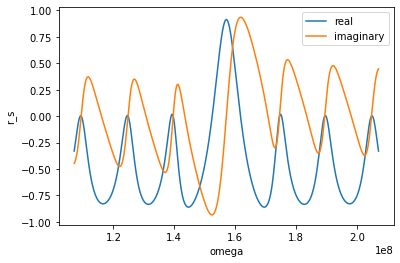

In [9]:
plt.plot(x,np.real(ref_coeffs),label='real')
plt.plot(x,np.imag(ref_coeffs), label='imaginary')
plt.xlabel('omega')
plt.ylabel('r_s')
plt.legend()

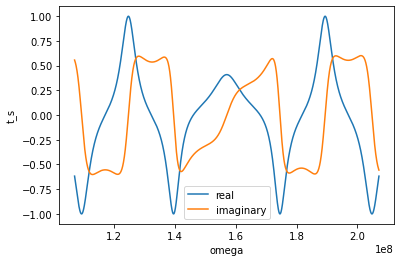

In [10]:
plt.plot(x,np.real(trans_coeffs),label='real')
plt.plot(x,np.imag(trans_coeffs), label='imaginary')
plt.xlabel('omega')
plt.ylabel('t_s')
plt.legend()

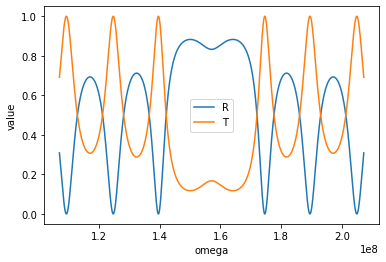

In [11]:
R = []
T = []

for r in ref_coeffs:
    R.append(np.abs(r)*np.abs(r))
    
for t in trans_coeffs:
    T.append(np.abs(t)*np.abs(t)*n_out/n_out)
    
plt.plot(x,R,label='R')
plt.plot(x,T,label='T')
plt.xlabel('omega')
plt.ylabel('value')
plt.legend()

Mikrownęka

In [12]:
# transition matrix across m layer structure
def getMatrixMC(omega,m):   
    T_a = trans_matrix_a(a,n_a,omega)
    T_b = trans_matrix_a(b,n_b,omega)
    
    # prawa strona  
    T = np.dot(T_a,T_b) # transition matrix across one ba layer
    T_m = T
    for i in range(m-1):
        T_m = np.dot(T_m,T) 
    # mikrownęka
    T_m = np.dot(T_m,T_b) 
    # lewa strona
    T = np.dot(T_b,T_a) # transition matrix across one ab layer
    for i in range(m-1):
        T_m = np.dot(T_m,T) 
        
    return T_m

In [17]:
xMC = np.linspace(2*np.pi*c/12-50000000,2*np.pi*c/12+50000000,10000)

ref_coeffsMC = []
trans_coeffsMC = []
for i in xMC:
    matrix = getMatrixMC(i,m)
    ref_coeffsMC.append(reflection_coeff(n_out, n_out, matrix))
    trans_coeffsMC.append(transmission_coeff(n_out, n_out, matrix))

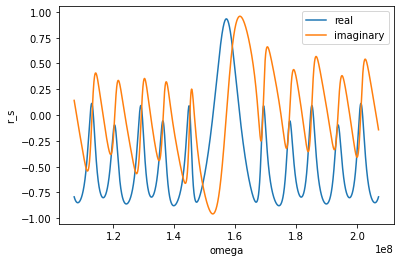

In [18]:
plt.plot(xMC,np.real(ref_coeffsMC),label='real')
plt.plot(xMC,np.imag(ref_coeffsMC), label='imaginary')
plt.xlabel('omega')
plt.ylabel('r_s')
plt.legend()

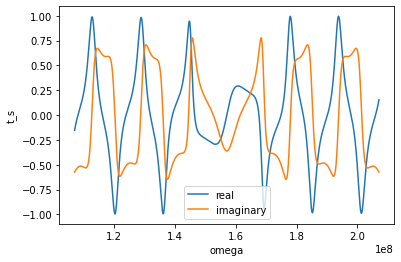

In [19]:
plt.plot(xMC,np.real(trans_coeffsMC),label='real')
plt.plot(xMC,np.imag(trans_coeffsMC), label='imaginary')
plt.xlabel('omega')
plt.ylabel('t_s')
plt.legend()

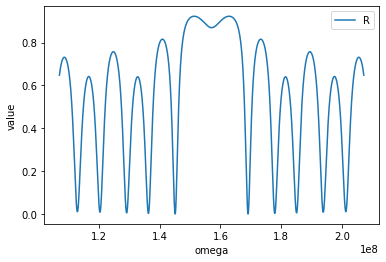

In [20]:
R_MC = []
T_MC = []

for r in ref_coeffsMC:
    R_MC.append(np.abs(r)*np.abs(r))
    
for t in trans_coeffsMC:
    T_MC.append(np.abs(t)*np.abs(t)*n_out/n_out)
    
plt.plot(xMC,R_MC,label='R')
#plt.plot(xMC,T_MC,label='T')
plt.xlabel('omega')
plt.ylabel('value')
plt.legend()